<a href="https://colab.research.google.com/github/brandonb1121/test-assignment-brandonb1121/blob/main/DATA_301_Lab_1A_Brandon_Brownell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**

1. I think the percentage of values to have a first digit of 1 will be 11.11%. Additionally, I also think the percentage of values to have a first digit of 9 will also be 11.11%. Because 0 is ignored as a first digit possibility, there is a 1 in 9 change that a random number will have a specific digit as their first digit. This means for 1 or for 9, there is a 1/9 probability (0.1111) that the digit will be the first digit for a number if it is from random data.

2. I think the percentage of values to have a last digit of 1 will be 10%. Additionally, I also think the percentage of values to have a last digit of 9 will also be 10%. Given that 0 is now included for being a last digit in a number, this means there are now 10 possibilites for what a last digit could be. This means for 1 or for 9, there is a 1/10 probability (0.10) that the digit will be the last digit for a number if it is from random data.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [2]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")
df_sp500.set_index("Name", inplace=True)
df_sp500

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


**ENTER YOUR WRITTEN EXPLANATION HERE.**

*What is the unit of observation in this data set?*

The unit of observation in this data set is a company in the S&P500

*Is there a variable that is natural to use as the index?*

Yes, since each observational unit is a company in the S&P500 there can be no duplicates as each company is unique. Thus, we can use the 'Name' variable as the index.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

1    0.326733
2    0.184158
3    0.116832
4    0.085149
5    0.081188
6    0.071287
7    0.049505
8    0.043564
9    0.041584
Name: vol_first_digit, dtype: float64

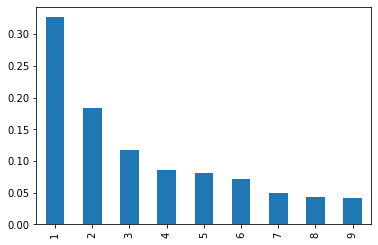

In [9]:
df_sp500["volume"] = df_sp500["volume"].astype(str)
df_sp500["vol_first_digit"] = df_sp500["volume"].str.split("").str[1]
vol_first_digit_dist = df_sp500["vol_first_digit"].value_counts(normalize=True)
vol_first_digit_dist.plot.bar()
vol_first_digit_dist


**ENTER YOUR WRITTEN EXPLANATION HERE.**

*How does this compare with what you predicted in Question 0?*

In comparison to my estimates in question 0, the percentage of values that have 1 as a first digit is much higher than I anticipated. The proportion of numbers with a first digit of 1 is 0.327, which is over triple my estimate of 0.111. On the other hand, the percentage of values that have 9 as a first digit was much smaller than I anticipated. The proportion of numbers with a first digit of 9 was 0.0416, which is less than half of my estimate of 0.111.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

0    0.102970
1    0.104950
2    0.110891
3    0.095050
4    0.079208
5    0.087129
6    0.100990
7    0.102970
8    0.110891
9    0.104950
Name: vol_last_digit, dtype: float64

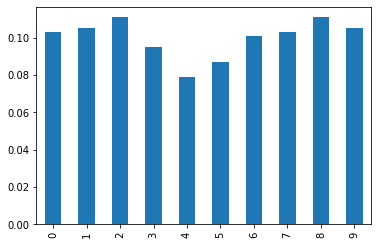

In [20]:
df_sp500["volume"] = df_sp500["volume"].astype(str)
df_sp500["vol_last_digit"] = df_sp500["volume"].str.split("").str[-2]
vol_last_digit_dist = df_sp500["vol_last_digit"].value_counts(normalize=True)
vol_last_digit_dist = vol_last_digit_dist.sort_index()
vol_last_digit_dist.plot.bar()
vol_last_digit_dist
#vol_last_digit_dist.plot.bar()
#vol_series = pd.Series(df_sp500["volume"].str.split(""))
#for i in range(total_num_3):
# vol_series.iloc[i] = vol_series.iloc[i][::-1]
#method for reversing each array was from https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
#df_sp500["vol_last_digit"] = vol_series.str[1]




**ENTER YOUR WRITTEN EXPLANATION HERE.**

*Compare with your prediction in Question 0*

In comparison to question 2, my estimations made in question 0 were much closer to the true proportions of the last digits in this data. Both 1 and 9 as last digits had the same proportion of 0.105. These true proportions were really close to my estimate of 0.10, meaning they did actually have about a 1 in 10 change of occuring as a last digit.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

1    0.338614
2    0.108911
3    0.102970
6    0.095050
4    0.085149
7    0.085149
5    0.077228
8    0.055446
9    0.051485
Name: close_first_digit, dtype: float64

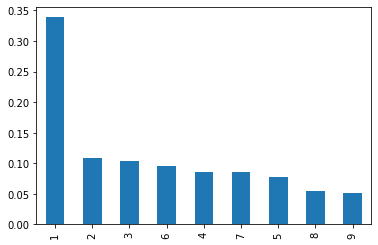

In [26]:
#The close column was an object type because it had to include $ in its entry
#Since it was already an object type, I did not need to change it before splitting it
df_sp500["close_first_digit"] = df_sp500["close"].str.split("").str[2]
close_first_digit_dist = df_sp500["close_first_digit"].value_counts(normalize=True)
close_first_digit_dist.plot.bar()
close_first_digit_dist




**ENTER YOUR WRITTEN EXPLANATION HERE.**

*Comment on what you see.*

Similar to what occured in Question 2, the proportion of occurence for each digit as a first digit decreases as the digit increases. The proportion of 1 being the first digit is noticibably higher again with a proportion of 
0.339. Moreover, the proportion of 9 being the first digit is the lowest again with a proportion of 0.0515.